In [3]:
from sympy import symbols, factorial, solve, Sum, Eq
from sympy import nsolve
from sympy.abc import k
rho = symbols('rho', real=True, positive=True)
sum_part = Sum(rho**k / factorial(k), (k, 0, 5)).doit()
extra_part = (rho**5 / 120) * (rho / 5 + rho**2 / 25)
numerical_solution = nsolve(rho**7 - 1500 * (sum_part + extra_part), rho, 10)  # Start at 10
print("Numerical solution:", numerical_solution)

Numerical solution: 9.67871624693321


In [20]:
# from scipy.optimize import bisect
# import math
# import numpy as np

# # Define the function
# def q_loss(rho):
#     sum_part = sum(rho**k / math.factorial(k) for k in range(6))
#     extra_part = (rho**5 / 120) * (rho / 5 + rho**2 / 25)
#     return rho**7 - 1500 * (sum_part + extra_part)

# # Solve using bisection method
# solution = bisect(q_loss, 1, 1000)  # Look for solution in the range [1, 100]
# print("Numerical solution using bisect:", solution)

Numerical solution using bisect: 9.678716246934483


In [1]:
from scipy.optimize import bisect
import math
import numpy as np

def q_loss(rho, m = 5, n = 2, threshold = 0.5):
    '''
    Комминтарий:
    rho: буква ро, rho = a / b
    m: количество обслуживающих приборов 
    n: количество мест 
    threshold: порог равный 0.5 в условие задачи
    '''
    sum_k = sum(rho**k / math.factorial(k) for k in range(m + 1))
    sum_j = (rho**m / math.factorial(m)) * sum((rho**j) / (m**j) for j in range(1, n + 1))
    return rho**(m+n) - threshold * math.factorial(m) * (m ** n) * (sum_k + sum_j)

'''
Комминтарий:
Функция bisect из библиотеки scipy
Границы: [0, 10 в 9 степени]
'''
solution = bisect(q_loss, 0, 10e9)  
print(f"Численное решение. Метод дихотомии, rho = a/b > {solution}")

Численное решение. Метод дихотомии, rho = a/b > 9.678716246933574


In [34]:
# Функция для вычисления вероятности потери
def q_loss(rho, m = 5, n = 2):
    # Вычисляем числитель: rho^(m+n) / (m! * m^n)
    numerator = (rho ** (m + n)) / (math.factorial(m) * (m ** n))
    
    # Сумма Σ(rho^k / k!) для k от 0 до m
    sum_k = sum(rho**k / math.factorial(k) for k in range(m + 1))
    
    # Сумма Σ(rho^j / (m^j * j!)) для j от 1 до n
    sum_j = (rho**m / math.factorial(m)) * sum((rho**j) / (m**j) for j in range(1, n + 1))
    
    # Полный знаменатель
    denominator = sum_k + sum_j
    
    # Результат q
    return numerator / denominator

# Solve using bisection method
solution = bisect(q_loss, 0, 100)  # Look for solution in the range [1, 100]
print("Numerical solution using bisect:", solution)

Numerical solution using bisect: 0.0


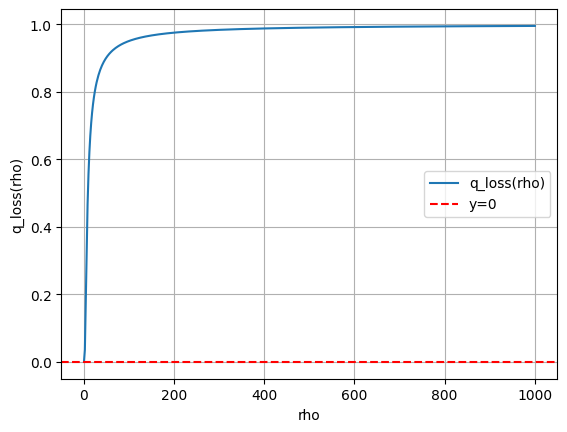

In [12]:
import numpy as np
import matplotlib.pyplot as plt

rho_values = np.linspace(1, 1000, 500)
q_loss_values = [q_loss(rho) for rho in rho_values]

plt.plot(rho_values, q_loss_values, label='q_loss(rho)')
plt.axhline(0, color='red', linestyle='--', label='y=0')
plt.xlabel('rho')
plt.ylabel('q_loss(rho)')
plt.legend()
plt.grid()
plt.show()


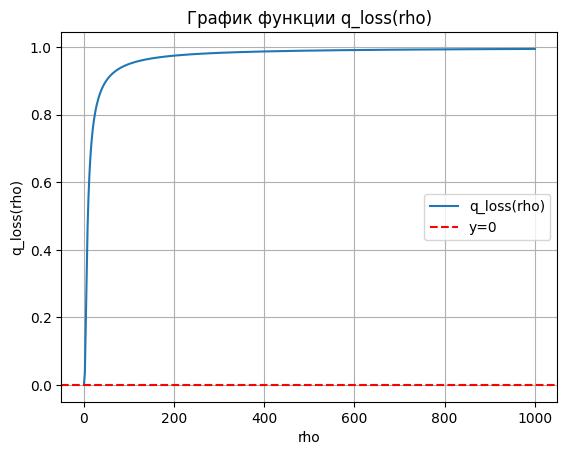

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Функция для вычисления вероятности потери
def q_loss(rho, K=7):
    numerator = (rho ** K) / (math.factorial(5) * 25)
    denominator = (1 + rho + rho**2 / 2 + rho**3 / 6 +
                   rho**4 / 24 + rho**5 / 120 +
                   rho**5 / 120 * (rho / 5 + rho**2 / 25))
    return numerator / denominator

# Построение графика
rho_values = np.linspace(1, 1000, 500)
q_loss_values = [q_loss(rho) for rho in rho_values]

plt.plot(rho_values, q_loss_values, label='q_loss(rho)')
plt.axhline(0, color='red', linestyle='--', label='y=0')
plt.xlabel('rho')
plt.ylabel('q_loss(rho)')
plt.title('График функции q_loss(rho)')
plt.legend()
plt.grid()
plt.show()


In [7]:
import math
import numpy as np

# Функция для вычисления вероятности потери
def p_loss(rho, K=7):
    numerator = (rho ** K) / (math.factorial(5) * 25)
    # denominator = sum((rho ** n) / math.factorial(n) for n in range(K + 1))
    denominator = 1 + rho + rho**2 / 2 + rho**3 / 6 + rho**4 / 24 + rho**5 / 120 + rho**5/120 * (rho/5 + rho**2/25)
    return numerator / denominator

# Ищем значение rho, при котором вероятность потери больше 0.5
rho_values = np.linspace(0, 10, 1000)
p_loss_values = [p_loss(rho) for rho in rho_values]

# Находим значение rho, при котором вероятность потери превышает 0.5
threshold_rho = None
for rho, p in zip(rho_values, p_loss_values):
    if p > 0.5:
        threshold_rho = rho
        break

# Если не найдено, выводим сообщение об этом
if threshold_rho is not None:
    print(f"rho, при котором вероятность потери больше 0.5: {threshold_rho}")
else:
    print("Не найдено значения rho, при котором вероятность потери больше 0.5.")


rho, при котором вероятность потери больше 0.5: 9.67967967967968
